<a href="https://colab.research.google.com/github/uditnarayanpandey/Attribution-Methodology/blob/Master/Deep%20Learning/src/ANN_from_scratch/Building_ANN_From_Scratch_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Artificial Neural Network (From Scratch)**
---
This notebook focuses on building an Artificial Neural Network for regression problem from scratch. With help of this notebook we'll understand the basic functioning and learning of the algorithm


## **Steps in Backward Propagation**
---

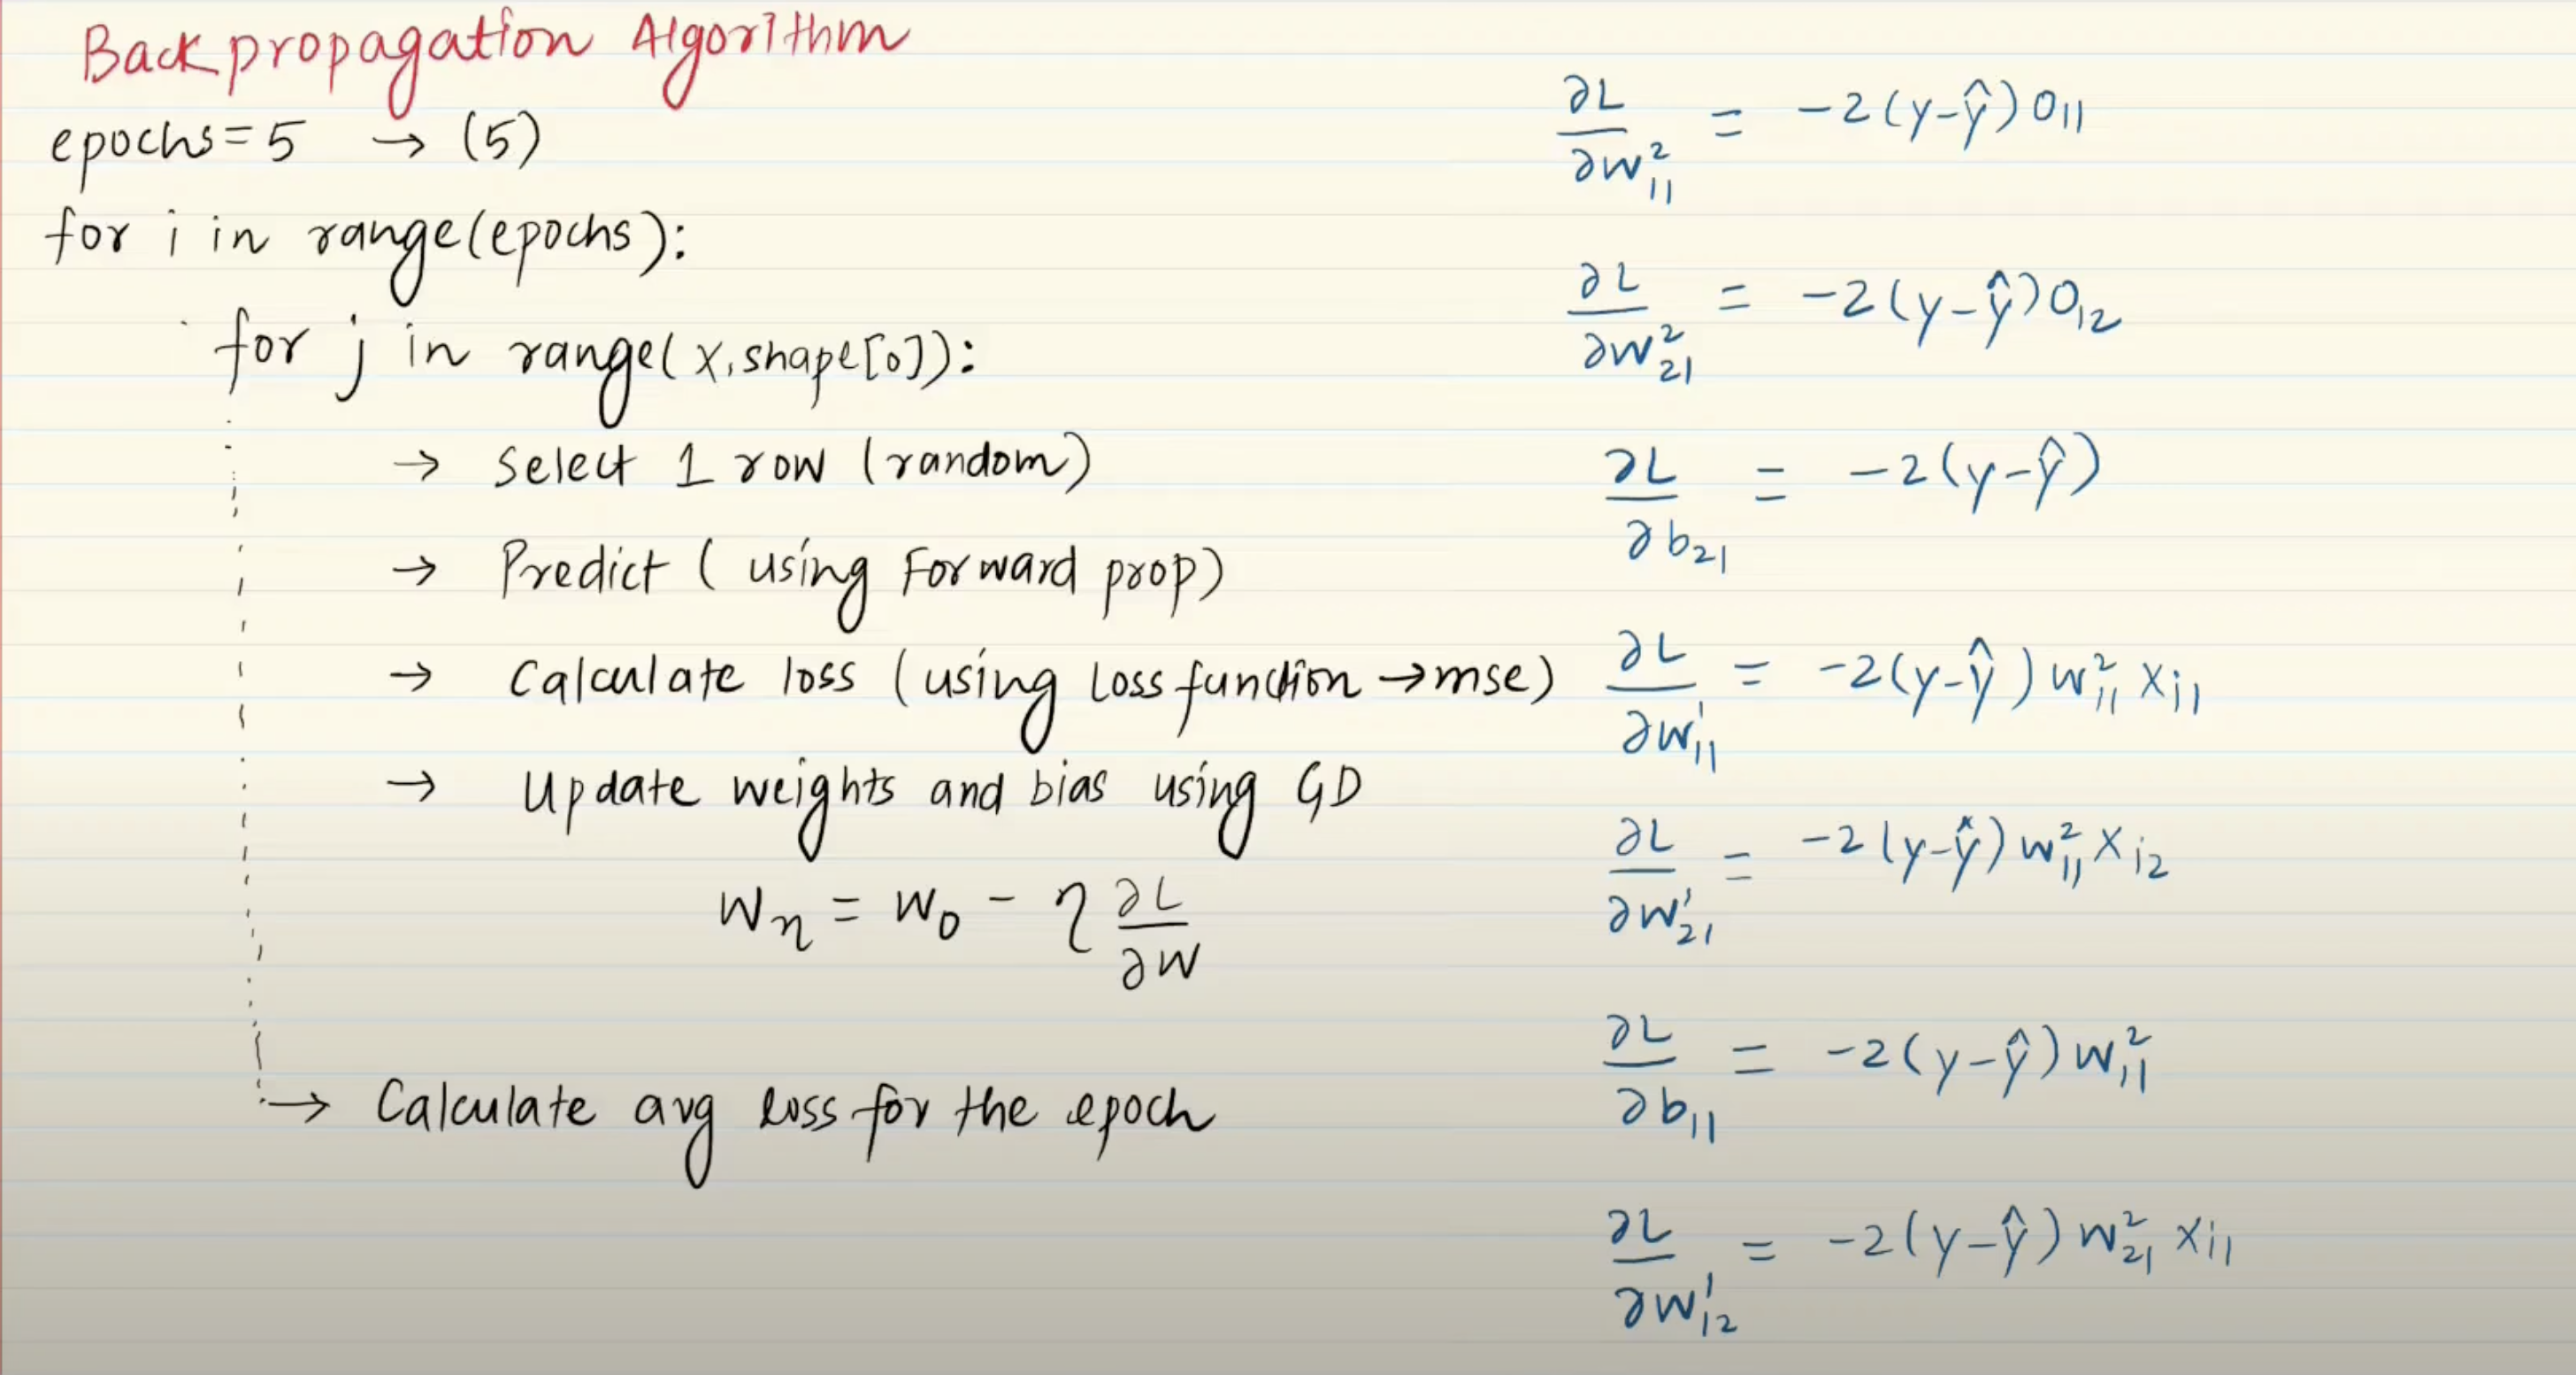

## **Importing Important Libraries**

In [3]:
import numpy as np
import pandas as pd

## **Building a Dataframe for Regression**

In [4]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa','profile_score','lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


## **Initializing Parameters**

In [5]:
def initialize_parameters(layers_dim:list)->dict:
    np.random.seed(3)
    parameters = {}
    L = len(layers_dim)

    #iterating to initialize weights and biases for layer1 & layer2
    for l in range(1,L):
        parameters['W'+str(l)] = np.ones((layers_dim[l-1],layers_dim[l]))*0.1 #initialising weights with .1
        parameters['b'+str(l)] = np.zeros((layers_dim[l],1)) #initialising biases with 0
    return parameters

## **Building Forward Propagation Logic**

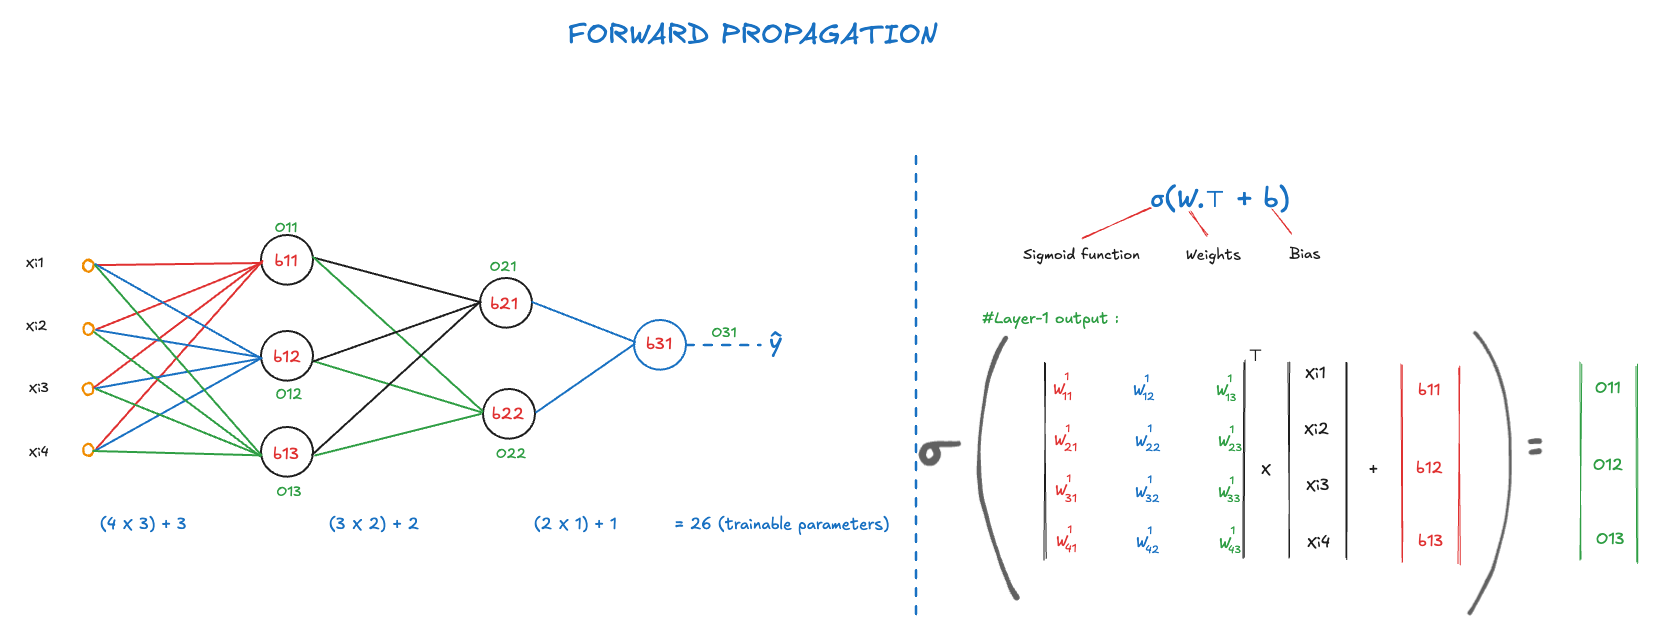

In [6]:
def forward_output(prev_input, weights, bias):
    """
    This function gives the output from each layer
    Input: prev_input -> input coming from previous
                         nodes
           weights -> weights of each layers
           bias -> bias of the node
    """
    Z = np.dot(weights.T, prev_input) + bias
    return Z

In [7]:
def forward_propagation(input_row, parameters):
    """
    This function takes table row as an input and
    the parameters initialised and perform the
    forward propagation
    Input - Input row -> from the Data
            parameters -> parameters initialised
    """
    #number of layers
    L = len(parameters)//2
    A = input_row
    for l in range(1, L+1): #iterating through each layer of perceptron
        prev_input = A
        #extracting weights and biases for the layer in iteration
        Wl = parameters['W'+str(l)]
        bl = parameters['b'+str(l)]
        print("A"+str(l-1), ": ", prev_input)
        print("W"+str(l)+": ", Wl)
        print("b"+str(l)+": ", Wl)
        print("--"*20)

        A = forward_output(prev_input, Wl, bl)
        print("A"+str(l)+": ", A)
        print("**"*20)

    return A, prev_input

In [8]:
#running the forward propagation for the firt row of the dataframe (sample run)
parameters = initialize_parameters([2,2,1])
forward_propagation(df[['cgpa', 'profile_score']].values[0].reshape(2,1), parameters)

A0 :  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.1 0.1]
 [0.1 0.1]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1 :  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.1]
 [0.1]]
----------------------------------------
A2:  [[0.32]]
****************************************


(array([[0.32]]),
 array([[1.6],
        [1.6]]))

In [9]:
def backward_propagation(parameters, y, y_hat, A1, input_row):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*input_row[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*input_row[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*input_row[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*input_row[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [10]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = forward_propagation(X,parameters)
y_hat = y_hat[0][0]

backward_propagation(parameters,y,y_hat,A1,X)
parameters

A0 :  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.1 0.1]
 [0.1 0.1]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1 :  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.1]
 [0.1]]
----------------------------------------
A2:  [[0.32]]
****************************************


{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [12]:
#Epochs implementation
parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = forward_propagation(X,parameters)
    y_hat = y_hat[0][0]

    backward_propagation(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

A0 :  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.1 0.1]
 [0.1 0.1]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1 :  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.1]
 [0.1]]
----------------------------------------
A2:  [[0.32]]
****************************************
A0 :  [[7]
 [9]]
W1:  [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
b1:  [[0.10658137 0.10658137]
 [0.10658137 0.10658137]]
----------------------------------------
A1:  [[1.70612461]
 [1.70612461]]
****************************************
A1 :  [[1.70612461]
 [1.70612461]]
W2:  [[0.111776]
 [0.111776]]
b2:  [[0.111776]
 [0.111776]]
----------------------------------------
A2:  [[0.50054357]]
****************************************
A0 :  [[ 6]
 [10]]
W1:  [[0.11458955 0.1168776 ]
 [0.11458955 0.1168776 ]]
b1:  [[0.11458955 0.1168776 ]
 [0.11458955 0.1168776 ]]
----------------------------------------
A1:  [[1.83539945]
 [1.87200826]]
********************

{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}